# TSF-SPARKS Foundation

## Task 1: Prediction using Supervised ML

Predict the percentage of a student based on no. of study hours.


### Importing required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Get data from GitHub raw file

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Split the data into features and target

In [3]:
X = df['Hours']
y = df['Scores']

### Visualize the data

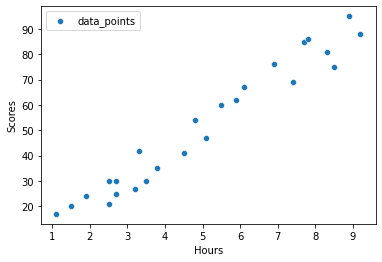

In [4]:
ax = sns.scatterplot(x=X, y=y, label="data_points");
y_min, y_max = ax.get_ylim()
x_min, x_max = ax.get_xlim()

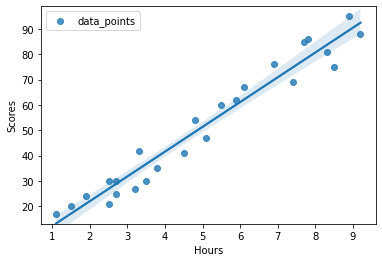

In [5]:
ax = sns.regplot(x=X, y=y, label="data_points")
ax.set_ylim(y_min, y_max)
ax.set_xlim(x_min, x_max)
ax.legend();

### Split the available data into training and test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Inspect the data

In [7]:
X_train[:5], y_train[:5], X_test[:5], y_test[:5]

(9     2.7
 13    3.3
 1     5.1
 22    3.8
 5     1.5
 Name: Hours, dtype: float64,
 9     25
 13    42
 1     47
 22    35
 5     20
 Name: Scores, dtype: int64,
 8     8.3
 16    2.5
 0     2.5
 23    6.9
 11    5.9
 Name: Hours, dtype: float64,
 8     81
 16    30
 0     21
 23    76
 11    62
 Name: Scores, dtype: int64)

#### Inspect types of our data after train_test_split

In [8]:
type(X_train), type(y_train), type(X_test), type(y_test)

(pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series)

#### Inspect shapes of our data after train_test_split

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20,), (20,), (5,), (5,))

### Reshape data

Looks like our data is in pandas Series type and has singular dimension. 

So we need ro first convert it into a numpy array and convert it into 2-dimensions using reshape(-1, 1)

In [10]:
X_train = X_train.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy().reshape(-1, 1)

In [11]:
X_test = X_test.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

### Create an instance of LinearRegression model

In [12]:
linear_model = LinearRegression()

### Fit the training data

In [13]:
linear_model.fit(X_train, y_train)

LinearRegression()

### Check out model's coefficient and intercept attributes

In [14]:
linear_model.coef_, linear_model.intercept_

(array([[9.68207815]]), array([2.82689235]))

In [15]:
coef = linear_model.coef_[0][0]
intercept = linear_model.intercept_[0]

### Visualize the predicted regression line

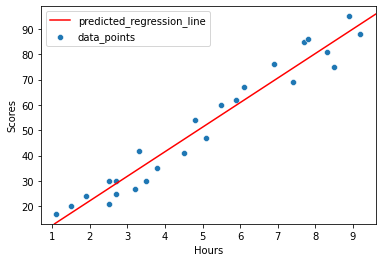

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
p1 = sns.scatterplot(data=df, x='Hours', y='Scores', label="data_points")
ax.axline((0, linear_model.intercept_[0]), slope=linear_model.coef_, label="predicted_regression_line", color="r")
ax.set_ylim(y_min, y_max)
ax.set_xlim(x_min, x_max)
ax.legend();

Looks like our `LinearRegression` model is performing quite well as seen in the plot.

But let's confirm it with visualizing the error rate of our model...

In [17]:
preds = linear_model.predict(X_test)

In [18]:
y_test

array([[81],
       [30],
       [21],
       [76],
       [62]])

In [19]:
residuals = abs(y_test - preds)

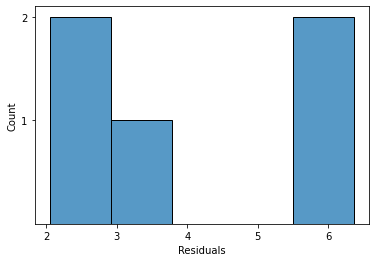

In [20]:
ax = sns.histplot(residuals, bins=5)
ax.set_xlabel("Residuals")
ax.set_yticks([1.0, 2.0])
ax.legend_.remove();

Seems like our model has low error rate...

Checking out model evaluation metrics to double check the performance of our model...

In [21]:
mae = mean_absolute_error(y_true=y_test, y_pred=preds)
mse = mean_squared_error(y_true=y_test, y_pred=preds)
r_squared_score = r2_score(y_true=y_test, y_pred=preds)

In [22]:
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R_Squared_Score: {r_squared_score:.4f}")

Mean Absolute Error: 3.9208
Mean Squared Error: 18.9432
R_Squared_Score: 0.9678


Now we can confirm our model is performing very well as it's r2_score is ~0.97 (very close to 1.0)

### Make prediction on custom data

Let's predict the score if a student studies 9.25hrs/day

In [23]:
hours = np.array(9.25)
hours = hours.reshape(1, -1)
predicted_score = linear_model.predict(hours)
predicted_score = predicted_score[0][0]

In [24]:
print(f"The predicted score of a student studying 9.25hrs/day is {predicted_score:.2f}")

The predicted score of a student studying 9.25hrs/day is 92.39
